# Part 1: Column Space of a Matrix

Definition: the *column space* of a matrix is the set of all linear combinations of that matrix's columns.

In [1]:
import numpy as np
A = np.array([
    [1,100],
    [2,10],
    [3,0]
])
B = np.array([
    [1,0],
    [0,2],
    [0,3],
    [0,0]
])

$A = \begin{bmatrix}
1&100\\
2&10\\
3&0\\
\end{bmatrix}$

In [2]:
A @ np.array([-1,1]).reshape(-1,1)

array([[99],
       [ 8],
       [-3]])

In [3]:
A @ np.array([0,0]).reshape(-1,1)

array([[0],
       [0],
       [0]])

What vectors are in the column space of B?

$B = \begin{bmatrix}
1&0\\
0&2\\
0&3\\
0&0\\
\end{bmatrix}$

$a=\begin{bmatrix}
2\\
2\\
3\\
0
\end{bmatrix}, b=\begin{bmatrix}
0\\
0\\
0\\
1
\end{bmatrix}, c=\begin{bmatrix}
-10\\
0\\
0\\
0
\end{bmatrix}, d=\begin{bmatrix}
0\\
-2\\
3\\
0
\end{bmatrix}, e=\begin{bmatrix}
-1\\
2\\
3\\
0
\end{bmatrix}$

In [4]:
# in the column space of B: a, c, e
# not in the column space: b, d
c = np.array([-10, 0]).reshape(-1,1) # coef
B @ c

array([[-10],
       [  0],
       [  0],
       [  0]])

# Part 2: When can we solve for c?

Suppose $Xc = y$.

$X$ and $y$ are known, and we want to solve for $c$.

When does `c = np.linalg.solve(X, y)` work?

## Fruit Sales Example

### Data

* `10 apples and 0 bananas sold for $7`
* `2 apples and 8 bananas sold for $5`
* `4 apples and 4 bananas sold for $5`

### Equations

* `10*apple + basket == 7`
* `2*apple + 8*banana + basket == 5`
* `4*apple + 4*banana + basket == 5`

### Matrix

In [5]:
import numpy as np

X = np.array([
    [10,0,1],
    [2,8,1],
    [4,4,1],
    [4,4,1],
])
y = np.array([7,5,5,5.5]).reshape(-1,1)

# needs to be mathematically solveable, X needs to be square
#c = np.linalg.solve(X, y)
#c

### Equivalent Statements

* there's a solution for the system of equations
* there's a solution for $c$ (in $Xc = y$), even if `np.linalg.solve` can't find it
* $y$ is in the column space of $X$

# The Problem with Most Tables

More rows than columns in our dataset means more equations than variables.

This *usually* means that:

The equations aren't solvable, and y isn't in the column space of X.

In [6]:
# not solveable
#c = np.linalg.solve(X, y)

In [7]:
c = np.linalg.solve(X.T@X, X.T@y)
c

array([[0.375],
       [0.125],
       [3.25 ]])

In [8]:
X @ c

array([[7.  ],
       [5.  ],
       [5.25],
       [5.25]])

# Part 3: Projection Matrix

Say X and y are known, but we can't solve for c because X has more rows than columns:

### <font color='red'>$Xc = y$</font>

We can, however, usually (unless there are multiple equally good solutions) solve the following, which we get by multiplying both sides by $X^T$:

### <font color='red'>$X^TXc = X^Ty$</font>

If we can find a c to make the above true, we can multiple both sides by $(X^TX)^{-1}$ (which generally exists unless X columns are redundant) to get this equation:

$(X^TX)^{-1}X^TXc = (X^TX)^{-1}X^Ty$

Simplify:

$c = (X^TX)^{-1}X^Ty$

Multiply both sides by X:

### <font color='red'>$Xc = X(X^TX)^{-1}X^Ty$</font>

### Note we started with an unsolveable $Xc = ????$ problem but multiplied $y$ by something to get a different $Xc = ????$ that is solveable.

Define <font color="red">$P = X(X^TX)^{-1}X^T$</font>.  This is a **projection matrix**.  If you multiply a vector by $P$, you get back another vector of the same size, with two properties:

1. it will be in the column space of $X$
2. the new vector will be as "close as possible" to the original vector

Note: computing P is generally very expensive.

## Fruit Sales Example

In [12]:
import numpy as np
import pandas as pd

X = np.array([
    [10,0,1],
    [2,8,1],
    [4,4,1],
    [10,4,1],
    [10,4,1]
])
y = np.array([7,5,5,8,8.5]).reshape(-1,1)
y

array([[7. ],
       [5. ],
       [5. ],
       [8. ],
       [8.5]])

$P = X(X^TX)^{-1}X^T$

In [13]:
P = X @ np.linalg.inv(X.T @ X) @ X.T
P

array([[ 0.75      , -0.25      ,  0.33333333,  0.08333333,  0.08333333],
       [-0.25      ,  0.75      ,  0.33333333,  0.08333333,  0.08333333],
       [ 0.33333333,  0.33333333,  0.55555556, -0.11111111, -0.11111111],
       [ 0.08333333,  0.08333333, -0.11111111,  0.47222222,  0.47222222],
       [ 0.08333333,  0.08333333, -0.11111111,  0.47222222,  0.47222222]])

In [14]:
P @ y

array([[7.04166667],
       [5.04166667],
       [4.94444444],
       [8.23611111],
       [8.23611111]])

## Scatter Example

In [15]:
import pandas as pd
x = np.random.normal(5, 2, size=(10,1))
y = 2*x + np.random.normal(size=x.shape)
df = pd.DataFrame({"x":x.reshape(-1), "y":y.reshape(-1)})
df

,x,y
0,5.197656,9.340822
1,5.013382,10.197864
2,4.256771,7.243386
3,6.951217,13.508847
4,3.124108,8.479322
5,5.713863,12.565381
6,8.071969,16.434969
7,5.175849,10.685092
8,3.627390,7.995670
9,3.433761,5.241641


<AxesSubplot:xlabel='x', ylabel='y'>

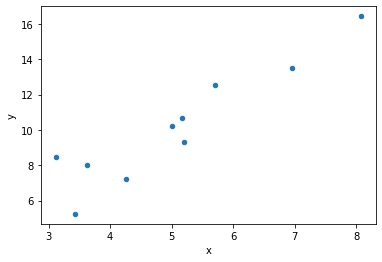

In [16]:
df.plot.scatter(x="x", y="y")

In [20]:
X = df[["x"]].values
P = X @ np.linalg.inv(X.T @ X) @ X.T
P

array([[0.09721622, 0.09376958, 0.07961803, 0.13001458, 0.05843287,
        0.10687129, 0.15097696, 0.09680835, 0.06784618, 0.06422457],
       [0.09376958, 0.09044514, 0.07679531, 0.12540513, 0.05636123,
        0.10308235, 0.14562433, 0.09337617, 0.06544081, 0.0619476 ],
       [0.07961803, 0.07679531, 0.06520549, 0.10647919, 0.04785528,
        0.08752533, 0.12364694, 0.07928399, 0.05556459, 0.05259857],
       [0.13001458, 0.12540513, 0.10647919, 0.1738783 , 0.07814668,
        0.14292703, 0.20191287, 0.1294691 , 0.09073582, 0.08589236],
       [0.05843287, 0.05636123, 0.04785528, 0.07814668, 0.03512171,
        0.06423615, 0.09074634, 0.05818771, 0.04077969, 0.03860288],
       [0.10687129, 0.10308235, 0.08752533, 0.14292703, 0.06423615,
        0.11748526, 0.1659713 , 0.10642291, 0.07458436, 0.07060306],
       [0.15097696, 0.14562433, 0.12364694, 0.20191287, 0.09074634,
        0.1659713 , 0.23446748, 0.15034353, 0.10536524, 0.09974087],
       [0.09680835, 0.09337617, 0.0792839

In [23]:
df["p"] = P @ df[["y"]].values
df

,x,y,p
0,5.197656,9.340822,10.430555
1,5.013382,10.197864,10.060757
2,4.256771,7.243386,8.542404
3,6.951217,13.508847,13.949568
4,3.124108,8.479322,6.269399
5,5.713863,12.565381,11.466470
6,8.071969,16.434969,16.198670
7,5.175849,10.685092,10.386793
8,3.627390,7.995670,7.279375
9,3.433761,5.241641,6.890804


In [25]:
df["p"] / df["x"]

0    2.006781
1    2.006781
2    2.006781
3    2.006781
4    2.006781
5    2.006781
6    2.006781
7    2.006781
8    2.006781
9    2.006781
dtype: float64

<AxesSubplot:xlabel='x', ylabel='p'>

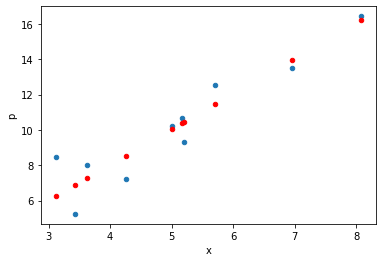

In [27]:
ax = df.plot.scatter(x="x", y="y")
df.plot.scatter(x="x", y="p", ax=ax, color="red")

In [28]:
df

,x,y,p
0,5.197656,9.340822,10.430555
1,5.013382,10.197864,10.060757
2,4.256771,7.243386,8.542404
3,6.951217,13.508847,13.949568
4,3.124108,8.479322,6.269399
5,5.713863,12.565381,11.466470
6,8.071969,16.434969,16.198670
7,5.175849,10.685092,10.386793
8,3.627390,7.995670,7.279375
9,3.433761,5.241641,6.890804


# Euclidean Distance Between Columns

In [29]:
df2 = pd.DataFrame({
    "v1": [1, 8],
    "v2": [4, 12],
}, index=["x", "y"])
df2

,v1,v2
x,1,4
y,8,12


In [33]:
((df2["v2"] - df2["v1"]) ** 2).sum() ** 0.5

5.0

In [34]:
df.head()

,x,y,p
0,5.197656,9.340822,10.430555
1,5.013382,10.197864,10.060757
2,4.256771,7.243386,8.542404
3,6.951217,13.508847,13.949568
4,3.124108,8.479322,6.269399


In [36]:
((df["y"] - df["p"]) ** 2).sum() ** 0.5

3.543585780632153